# Exercise sheet 4

# Exercise 1 - ANOVA F-test and Hierarchical Clustering (8 points)

Load the leukemia dataset. It contains gene expression data of 1397 genes from 38
tumor mRNA samples. The expression data is organized in a matrix where rows
correspond to genes and columns to samples. The tumor class of the columns is given
in the file “golub.cl”

In [1]:
#importing Libraries

In [2]:
import pandas as pd 
import csv
from scipy.stats import f_oneway
import numpy as np
from numpy import loadtxt
import numpy as np
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from collections import defaultdict
from scipy.spatial.distance import pdist, cdist

In [3]:
df = pd.read_csv("leukemia.csv") 
print(df)

                       gene_name       V1       V2       V3       V4       V5  \
0     AFFX-HUMISGF3A/M97935_3_at  0.45695 -0.09654  0.90325 -0.07194  0.03232   
1       AFFX-HUMTFRR/M11507_5_at -0.56223  0.05358  0.12612 -0.84016 -0.43710   
2               AFFX-M27830_M_at  2.40116  1.83222  1.62478  1.59089  0.75700   
3      AFFX-HUMGAPDH/M33197_3_st  0.10806  0.08245  0.48019 -0.29554 -1.25777   
4        AFFX-HSAC07/X00351_M_st -0.33978 -0.12775  0.32201  0.12330 -1.42668   
...                          ...      ...      ...      ...      ...      ...   
1392              L78833_cds4_at -0.30476 -0.72056 -0.11296 -0.25346 -0.99706   
1393                   M93143_at -0.21661 -0.65287  0.27332 -0.35475 -0.89248   
1394                   U58516_at  0.04695  0.48704  0.72170  0.58403  0.30600   
1395                   X83863_at  0.45231  0.42686  0.67579  0.31524 -0.57779   
1396                   Z17240_at -0.35920 -0.43633  0.34031 -0.90930 -0.36663   

           V6       V7     

In [4]:
df2 = pd.read_csv("golub.cl.csv") 
print(df2)

    Unnamed: 0  x
0            1  0
1            2  0
2            3  0
3            4  0
4            5  0
5            6  0
6            7  0
7            8  0
8            9  0
9           10  0
10          11  0
11          12  0
12          13  0
13          14  0
14          15  0
15          16  0
16          17  0
17          18  0
18          19  0
19          20  0
20          21  0
21          22  0
22          23  0
23          24  0
24          25  0
25          26  0
26          27  0
27          28  1
28          29  1
29          30  1
30          31  1
31          32  1
32          33  1
33          34  1
34          35  1
35          36  1
36          37  1
37          38  1


1. ANOVA F-test


a. What are the assumptions of the ANOVA F-test? (1 point)

1. The samples are independent.

2. Each sample is from a normally distributed population.

3. Homoscedasticity - The population standard deviations of the groups are all equal.

b. For each gene in the dataset, perform the ANOVA F-test (assumptions are
already met) to see whether the gene is significantly differentially
expressed between the two types of Leukemia. (1 point)

In [ ]:
#Applying anova F-test to each gene

In [5]:
for i in range(len(df.iloc[:])):
    print(f_oneway(df.iloc[i,1:28], df.iloc[i,28:]))

F_onewayResult(statistic=0.012097026412254488, pvalue=0.9130309489991232)
F_onewayResult(statistic=20.08663501188826, pvalue=7.230054681786724e-05)
F_onewayResult(statistic=0.023704815111562135, pvalue=0.8784982489932728)
F_onewayResult(statistic=0.11927015655181797, pvalue=0.7318373003688895)
F_onewayResult(statistic=3.449931736969841, pvalue=0.07144979238630153)
F_onewayResult(statistic=1.6662599070096522, pvalue=0.20498870167290986)
F_onewayResult(statistic=13.247115489524097, pvalue=0.000850127950353513)
F_onewayResult(statistic=4.545975266683165, pvalue=0.039889426546870145)
F_onewayResult(statistic=0.1360907380071101, pvalue=0.7143595300570416)
F_onewayResult(statistic=0.002693274283314601, pvalue=0.9588978549242944)
F_onewayResult(statistic=0.027070729020981493, pvalue=0.8702328397144105)
F_onewayResult(statistic=0.07460349068505506, pvalue=0.7863092089678633)
F_onewayResult(statistic=1.326854547728168, pvalue=0.25695808048321633)
F_onewayResult(statistic=5.6449362280293185, pva

In [ ]:
#printing the p values for each gene

In [37]:
for i in range(len(df.iloc[:])):
    print(i, ":", f_oneway(df.iloc[i,1:28], df.iloc[i,28:])[1])

0 : 0.9130309489991232
1 : 7.230054681786724e-05
2 : 0.8784982489932728
3 : 0.7318373003688895
4 : 0.07144979238630153
5 : 0.20498870167290986
6 : 0.000850127950353513
7 : 0.039889426546870145
8 : 0.7143595300570416
9 : 0.9588978549242944
10 : 0.8702328397144105
11 : 0.7863092089678633
12 : 0.25695808048321633
13 : 0.022949071500715356
14 : 0.13712116075377406
15 : 0.11439828215479181
16 : 0.011463971355862579
17 : 0.00442333693098375
18 : 7.40586932291844e-05
19 : 0.04244179367525251
20 : 0.03513501658940894
21 : 0.0005377190176451508
22 : 0.04750015926103995
23 : 0.2335796908162403
24 : 0.46303565460552376
25 : 0.00011932582592009561
26 : 0.361664976631639
27 : 0.5496429735796816
28 : 0.0011383330212799436
29 : 0.0012433389005700177
30 : 0.03964600431728166
31 : 0.0009772206952648177
32 : 0.18539706465071917
33 : 0.9459878711742804
34 : 0.8929803111998108
35 : 0.497015197288178
36 : 0.5327384139920952
37 : 0.3976244132597756
38 : 0.5719496789347079
39 : 6.775128285959163e-06
40 : 0.5

c. Due to our analysis, we now know which genes are significantly
differentially expressed between groups. These will be the best features to
use in order to get good cluster separation. Subset only the rows which
represent the top 100 most significant genes. (1 point)

2. Plot 2 dendrograms using the 100 selected genes:

    
a. One for a single linkage approach and another one for ward approach. (1
point)

In [16]:
#pre-processing the data

In [17]:
filename  = "leukemia.csv"

raw_data = open(filename, 'rb')

D = loadtxt(raw_data, delimiter = ",", skiprows=1, usecols=range(1,39))

D_new = D[:100, :]

D_new

array([[ 4.56950e-01, -9.65400e-02,  9.03250e-01, ...,  2.43470e-01,
         9.07740e-01,  4.65090e-01],
       [-5.62230e-01,  5.35800e-02,  1.26120e-01, ..., -5.76870e-01,
         4.48080e-01,  1.19275e+00],
       [ 2.40116e+00,  1.83222e+00,  1.62478e+00, ...,  1.23143e+00,
         1.87913e+00,  2.49036e+00],
       ...,
       [ 2.42980e-01, -4.21450e-01,  1.21770e-01, ...,  2.14000e-03,
        -2.59820e-01,  3.84860e-01],
       [-1.45769e+00, -7.62930e-01, -4.76100e-01, ..., -3.34750e-01,
        -1.34579e+00, -1.32403e+00],
       [ 8.23600e-02,  4.31600e-02,  1.11560e-01, ...,  8.27980e-01,
         6.88700e-02,  2.72250e-01]])

In [ ]:
#Single Linkage Dendrogram

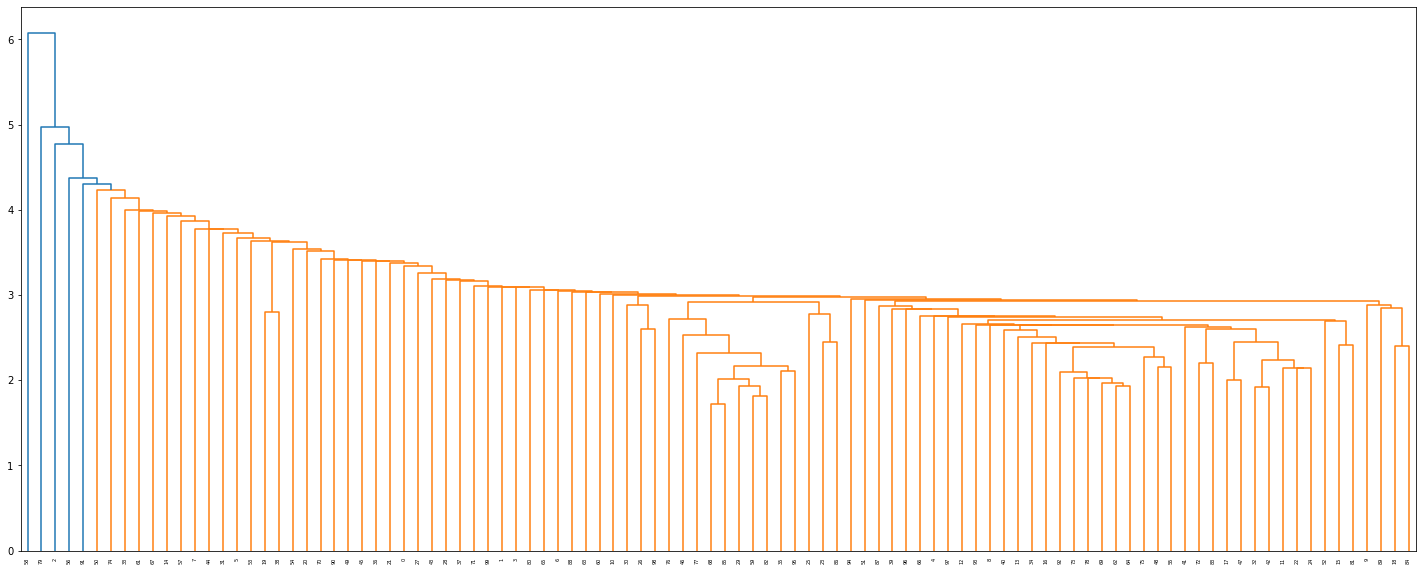

In [8]:
S = linkage(D_new, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(S)
plt.show()

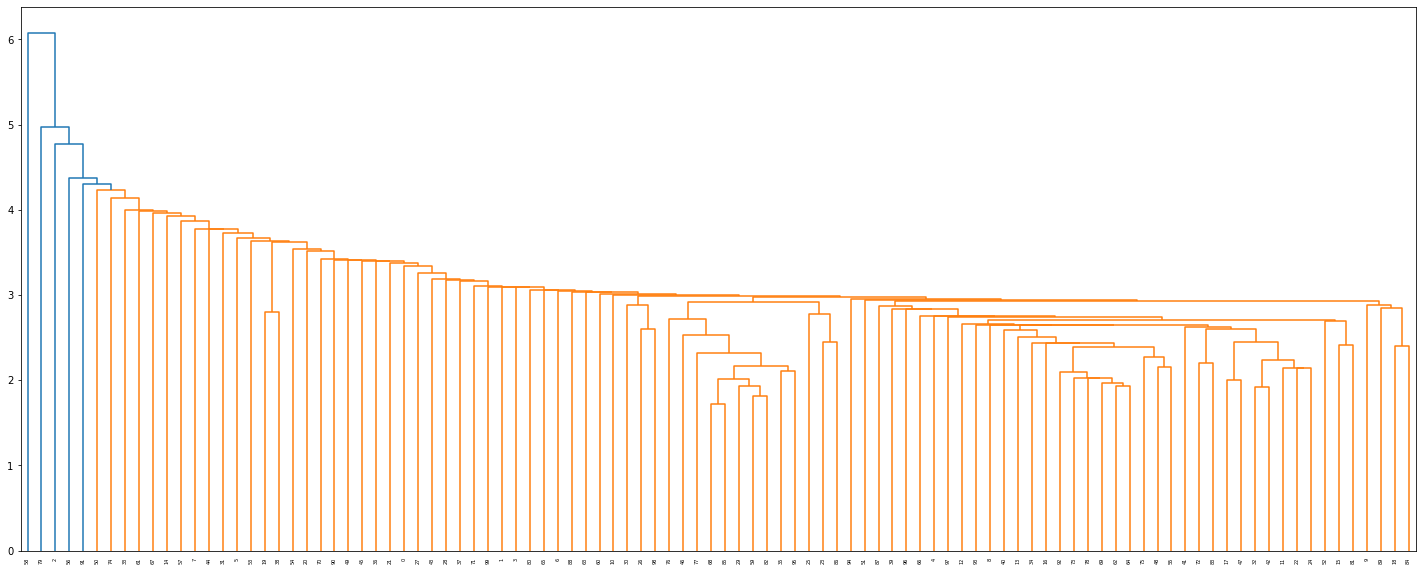

In [9]:
linked1 = linkage(D_new, 'single')

labelList = range(len(D_new))

plt.figure(figsize=(25, 10))  
dendrogram(linked1,
          labels = labelList,
          distance_sort = 'descending',
          show_leaf_counts = True)
plt.show()

In [ ]:
#Ward Dendrogram

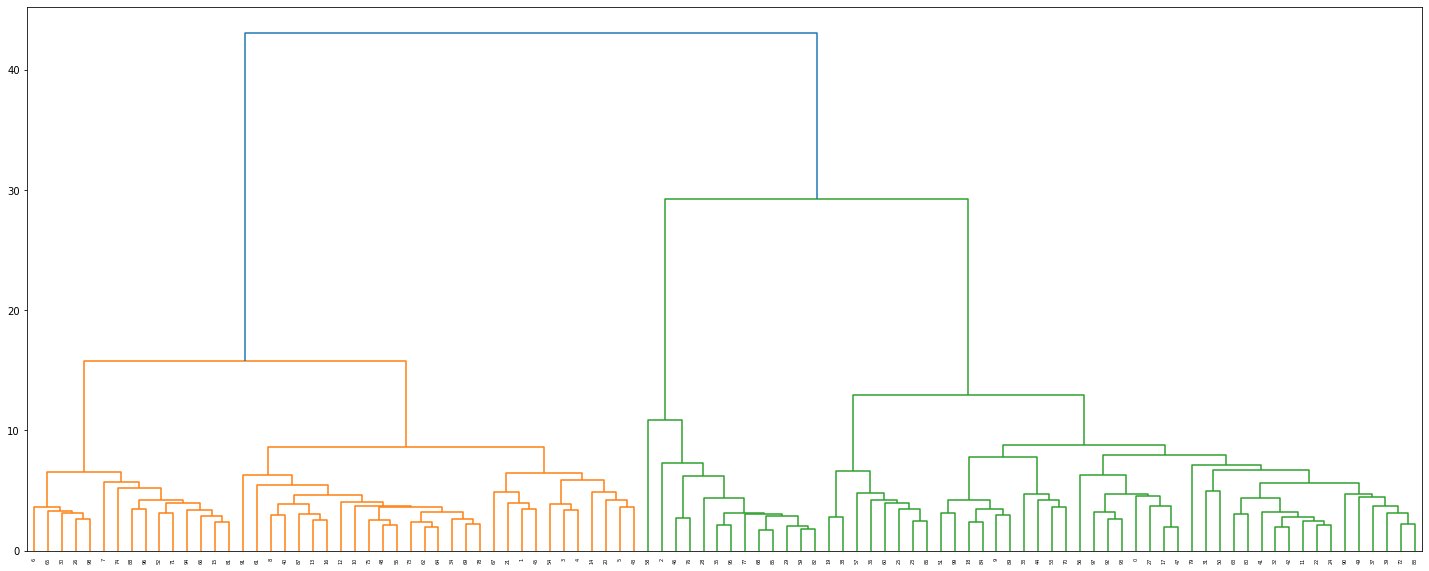

In [10]:
linked2 = linkage(D_new, 'ward')

labelList = range(len(D_new))

plt.figure(figsize=(25, 10))  
dendrogram(linked2,
          labels = labelList,
          distance_sort = 'descending',
          show_leaf_counts = True)
plt.show()

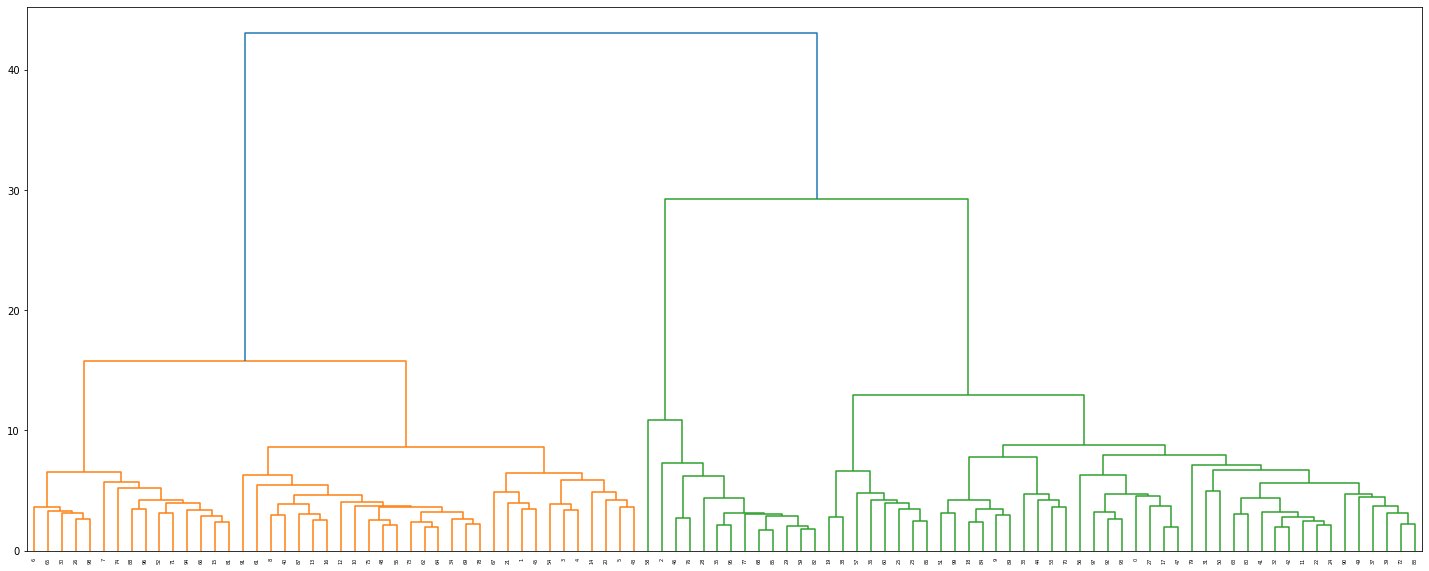

In [11]:
Z = linkage(D_new, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

b. Which method would you recommend based on the dendrograms for a
clustering? Why? (1 point)

Definitely, ward method of dendrogram for clustering is recommended as is very easy to visualise the clustering and they have share of objects clustered evenly, and in Single linkage, they tend to attach objects one by one to clusters.

c. Familiarize yourself with Cophenetic correlation coefficient and calculate
the cophenetic correlation distance for both single linkage as well as ward.
(1 point)

In [12]:
from scipy.cluster.hierarchy import cophenet

#cophenet score for Signle
c_S=cophenet(linked1,pdist(D_new))
print("The Cophenetic correlation distance for Signle Linkage is:", c_S)
print("------------------------------------------------------------------")
#cophenet score for Ward
c_W=cophenet(linked2,pdist(D_new))
print("The Cophenetic correlation distance for Ward is:", c_W)

The Cophenetic correlation distance for Signle Linkage is: (0.4493966805323262, array([3.34560208, 4.77534243, 3.34560208, ..., 2.99251285, 3.09576701,
       3.09576701]))
------------------------------------------------------------------
The Cophenetic correlation distance for Ward is: (0.5174898769533359, array([43.11320571, 29.30559226, 43.11320571, ..., 43.11320571,
        8.75685107, 43.11320571]))


d. Based on the cophenetic correlation distance, which clustering method
performed better? (1 point)

The ward clustering method performed better as the Cophenet index is closer to 1 and it indicates that the distance between these points increases with the dendrogram distance. It is very easy to visualize the clusters in a two-dimensional space, possible onlyif they are distinct from each other.

3. Apply two Agglomerative Clustering.
a. One using single linkage and one using ward method. (1 point)

In [ ]:
#single agglomerative

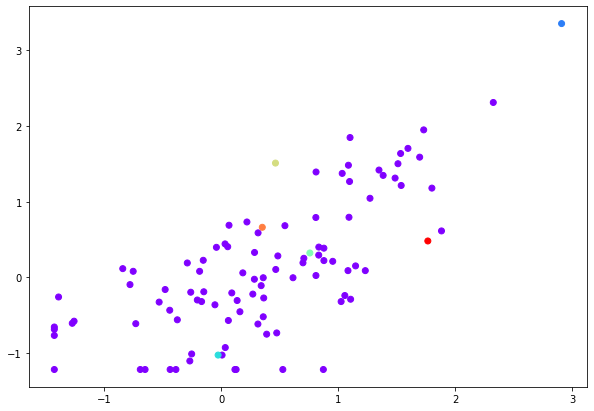

In [18]:
clusters=[]
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='single')  
clusters.append(cluster.fit_predict(D_new)) 
plt.figure(figsize=(10, 7))  
plt.scatter(D_new[:,4], D_new[:,9], c=cluster.labels_, cmap='rainbow') 
plt.show()

In [ ]:
#Ward agglomerative

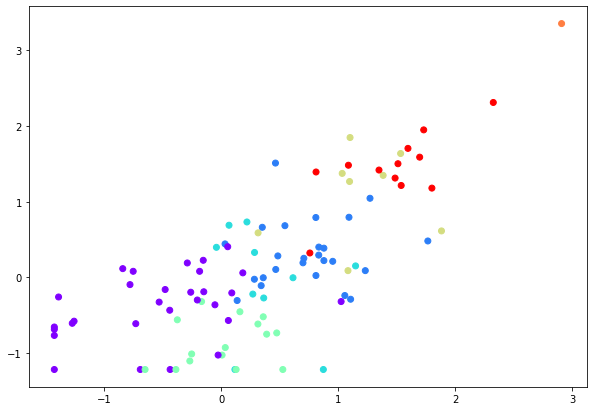

In [19]:
clusters=[]
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
clusters.append(cluster.fit_predict(D_new)) 
plt.figure(figsize=(10, 7))  
plt.scatter(D_new[:,4], D_new[:,9], c=cluster.labels_, cmap='rainbow') 
plt.show()

# Exercise 2 - PCA (8 points)

Using the same leukemia dataset generate the feature matrix (transposed leukemia
dataset) and the class labels (golub.cl.csv).

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
file = pd.read_csv("leukemia.csv")
X = file.drop("gene_name",axis=1)   #Feature Matrix
file = file.transpose() #Transpose the given dataset

In [22]:
target = pd.read_csv("golub.cl.csv") #Loading class labels
target = target.iloc[:,1]

In [23]:
from sklearn.preprocessing import StandardScaler
gene_names = file.iloc[0,:]
features = file.iloc[1:,:]
features = StandardScaler().fit_transform(features) #Standardizing the features 

1. Perform a PCA on the feature matrix and answer the following,



In [24]:
from sklearn.decomposition import PCA
components = 38 
pca = PCA(n_components=components)
principalComponents = pca.fit_transform(features) #Applying pca to the features matrix
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component ' + str(i) for i in range(1,39)])


a. How many PC’s do you need to explain at least 95% of the variance?
(1 point)

In [25]:
#Method 1
pca=PCA(.95)  
pca.fit(features)  
print('Number of components to explain 95% Variance is:',pca.n_components_)

Number of components to explain 95% Variance is: 32


In [26]:
#Method 2
#To check the cumulative freqeuncy for each pca component
for i in range(1,39):
    pca = PCA(n_components = i)
    pca_data = pca.fit_transform(features)
    print('\n')
    print('n_components:', i)
    total_var = 100* np.sum(pca.explained_variance_ratio_)
    print('Cumulative variance:',f'{total_var:.3}')



n_components: 1
Cumulative variance: 18.2


n_components: 2
Cumulative variance: 27.9


n_components: 3
Cumulative variance: 34.3


n_components: 4
Cumulative variance: 39.8


n_components: 5
Cumulative variance: 44.1


n_components: 6
Cumulative variance: 48.2


n_components: 7
Cumulative variance: 52.0


n_components: 8
Cumulative variance: 55.4


n_components: 9
Cumulative variance: 58.7


n_components: 10
Cumulative variance: 61.6


n_components: 11
Cumulative variance: 64.1


n_components: 12
Cumulative variance: 66.4


n_components: 13
Cumulative variance: 68.5


n_components: 14
Cumulative variance: 70.6


n_components: 15
Cumulative variance: 72.5


n_components: 16
Cumulative variance: 74.3


n_components: 17
Cumulative variance: 76.0


n_components: 18
Cumulative variance: 77.7


n_components: 19
Cumulative variance: 79.3


n_components: 20
Cumulative variance: 80.8


n_components: 21
Cumulative variance: 82.3


n_components: 22
Cumulative variance: 83.7


n_components: 23


By both the methods it can be observed that 32 PCA components are needed to explain 95% variance.

b. Make a scatterplot of the projections on the first two PC‘s with the
colouring corresponding to the class labels. (2 points)

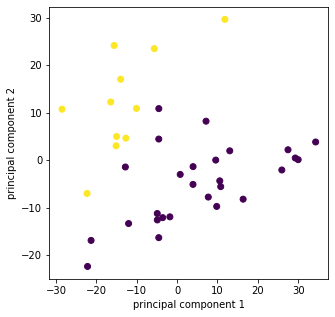

In [27]:
fig=plt.figure(figsize=(5,5))  
plt.scatter(principalDf['principal component 1'],principalDf['principal component 2'], c= target)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

c. Based on the scatterplot answer the following questions (2 point)

i. Given the plot, do you think PCA might be a good choice? Why?

ii. Do you think n=2 components are a good choice? Why?


Answer:

i.) After observing the plot, PCA might not a be good choice for 2 PCA components.

Answer:

ii.) PCA might not be a good choice using only 2 pca components. As it can bee seen that the first two pca components comprise of 27% cumulative variance which means that a lot of information about the dataset has been skipped. 

2. Inform yourself regarding decorrelation of features in a dataset

a. Identify the correlated features in the dataset (1 point)



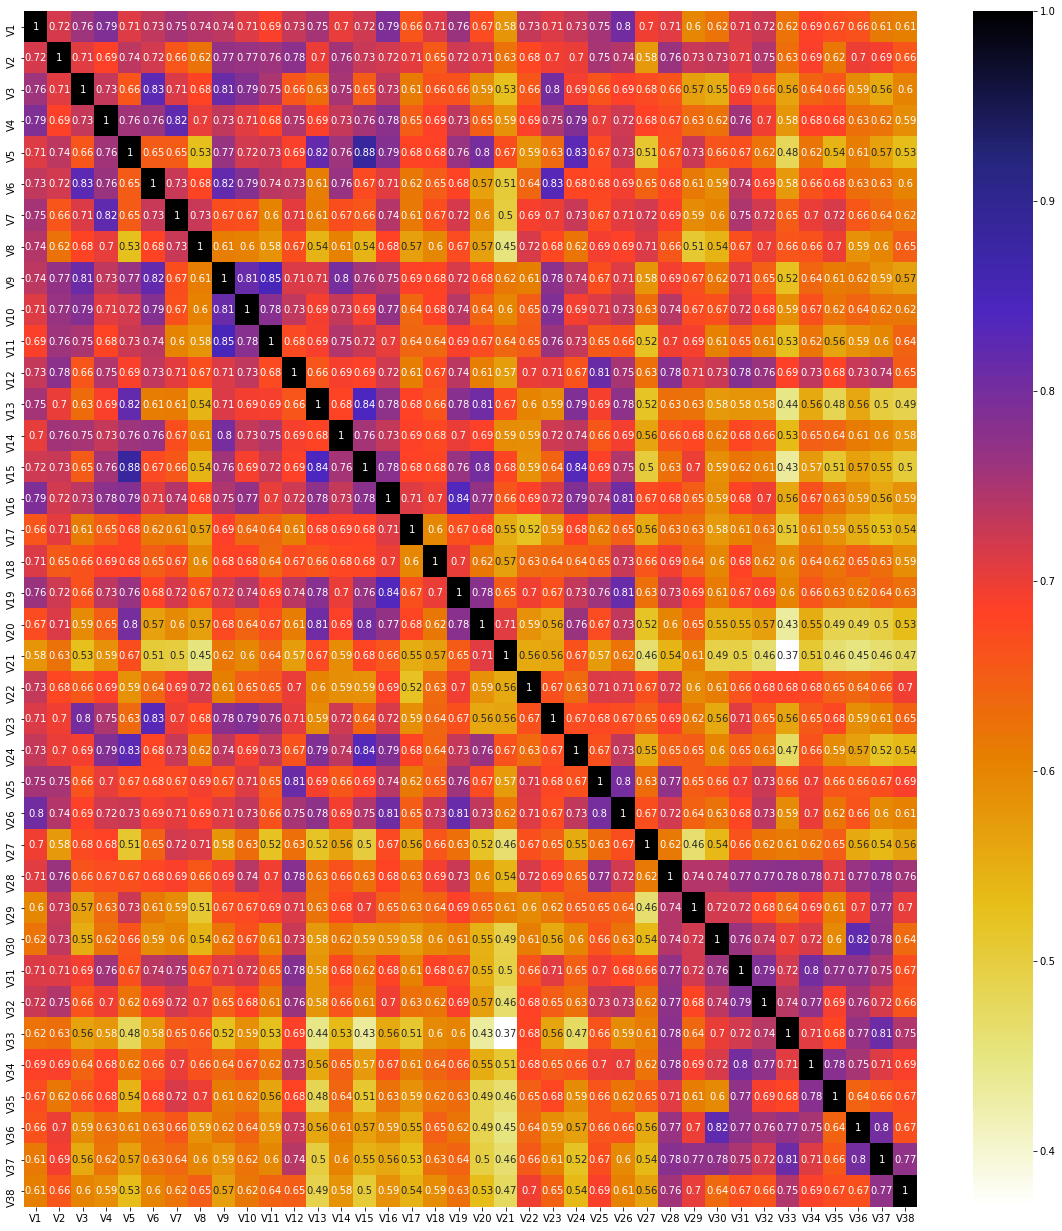

In [28]:
#Using Pearson Correlation
plt.figure(figsize=(20,22))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [29]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
correlation(X, 0.85)

{'V15'}

In [30]:
from scipy.stats import pearsonr
x=X['V15']
y=X['V5']
corr,pvalue = pearsonr(x,y)
corr

0.8831963192421686

b. Decorrelate the correlated datasets (1 point)



In [31]:
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

# Create a PCA instance: model
model = PCA()

# Apply the fit_transform method of model to X: pca_features
pca_features = model.fit_transform(X)
print(pca_features)

[[ 0.11345407 -0.23363077  0.0463453  ... -0.20290808 -0.18167681
   0.67646599]
 [-3.52026325  2.02096646  0.85466361 ...  0.14007714 -0.08454597
  -0.13975446]
 [ 8.80945223  2.12794129 -1.81408154 ... -0.28638622 -0.13159698
   0.07020065]
 ...
 [ 1.16169969  0.1342993  -0.38210457 ...  0.09654559  0.01774148
   0.10961632]
 [ 1.49247727  1.86020173 -0.71893234 ...  0.37610683 -0.0514549
  -0.31471313]
 [-3.75080144  0.77755629 -1.40843889 ...  0.15345249  0.09811835
  -0.76003864]]


c. What is the purpose of carrying out decorrelation of features in a dataset?
(1 point)

Answer:

If 2 or more features are correlated with each other, then it makes sense to decorelate them, as all of them explain the same dimension, thus, not adding any additional information.

So, when your data is considerably large, you might want to decorrelate the dataset before fitting an ML model, so that the size can be trimmed which would result in the model training and performing faster due to less number of columns.

Also, some parametric models carry the risk of being erratic due to their covariance matrix becoming singular (Reason: Due to multiple columns spanning the same dimension)

# Exercise 3 - Logistic Regression (9 points)

Using the reduced dataset from exercise 2.1, carry out the following tasks:

a) Generate a logistic regression model on the first 5 PCs of the reduced dataset using 80% of the total samples (2 points)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import brier_score_loss


#Reduced dataset
reduced_data = principalDf.iloc[:,:5]
# print(reduced_data)

golub = pd.read_csv("golub.cl.csv")

#Splitting Data into Training and Test Sets 
x = reduced_data
y = golub['x'] 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) #test size 20%

#Standardization of data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#Logistic Regression
lr = LogisticRegression()
model = lr.fit(x_train_scaled, y_train)

b. Predict the labels for the remaining 20% of the samples and calculate your model’s accuracy (2 points)

In [33]:
#Predict labels
predictions = lr.predict(x_test_scaled)
# print(predictions)

#Accuracy
score = lr.score(x_test, y_test)
print('The Accuracy score for above model is {}'.format(score))

The Accuracy score for above model is 0.875


c) Inform yourself about Brier’s Score. How can it be used to evaluate the performance of your model? Show by implementation. (2 points)

In [34]:
"""

The Brier score calculates the mean squared error between predicted probabilities and the expected values. It summarizes the magnitude of the error in the probability by penalizing those away from expected probabilities.
The performance of our model can be summarized by the average Brier score across all probabilities predicted for our test dataset.

"""

probs = lr.predict_proba(x_test_scaled)
probs = probs[:, 1] # Keeping only the values in positive label
loss = brier_score_loss(y_test, probs)
print('The Brier score loss for above model is {}'.format(loss))

The Brier score loss for above model is 0.057368957527795604


d) Assess the significance of your variables using the likelihood ratio test. (3 points)

Likelihood ratio test is a goodness-of-fit test between two models. It is used to check if one model fits the data significantly better than the other. The two models only differ in presence of some additional parameters. Adding more parameters improves the score but only until a certain point, this test is one of the criteria to select among different models.

Consider two models: A model without features and A model with features.
We want to find if the features really affect the outcome or response. We find p-vale which tells us the significance of the additional features added in model.

Consider two models:
+ Null model - No features
+ Alternate model - with features

The test is carried out as below:

In [35]:
from sklearn.metrics import log_loss
from scipy.stats import chi2

def likelihood_ratio_test(x_train_scaled, y_train):
    lr = LogisticRegression()
    y_train = np.array(y_train)
    x_train_scaled = np.array(x_train_scaled)
    
    lr.fit(x_train_scaled, y_train)
    alt_prob = lr.predict_proba(x_train_scaled)
    null_prob = sum(y_train)/float(y_train.shape[0])*np.ones(y_train.shape)
    df = x_train_scaled.shape[1]
    alt_log_likelihood = -log_loss(y_train, alt_prob, normalize = False)
    null_log_likelihood = -log_loss(y_train, null_prob, normalize = False)
    
    LR = 2*(alt_log_likelihood - null_log_likelihood)
    p_value = chi2.sf(LR, df)
    return LR, p_value

In [36]:
lr, p = likelihood_ratio_test(x_train_scaled, y_train)
print('From above test, we get:\nLikelihood ratio: {}\nCritical P-vale: {}'.format(lr,p))

From above test, we get:
Likelihood ratio: 29.024964546527144
Critical P-vale: 2.292756290615694e-05


To have made a good inference, we want a small probability of false alarm and a large probability of detection.
If LR value is statistically significant, then the less restrictive model (the one with more variables) is said to fit the data significantly better than the more restrictive model.
We have the associated p-value < 0.001, indicating that the model with all four features fits significantly better than no features.

**Hence in such case, we say we accept the alternative model and the model with four variables fit significantly better than model with no variables.**